In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

#Анализ категорий:

> Добавить блок с цитатой

* Здоровые
* Гипертоники (АГ)
* Острый инфаркт миокарда
* Перенесенный инфаркт миокарда 6 месяцев назад.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab_file/data_rrg_big.csv')
# df['patient'] = df['patient'].astype('category')
df.head(10)

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
0,АГ-001_1,0.911795,0.852760,0.912,0.852,0.019906,0.028938,0.812,0.636,0.948,1.056,0.913706,0.852877,0.020,0.032,0.012,0.016,AG
1,АГ-002_1,0.729976,0.659733,0.728,0.660,0.032458,0.029800,0.580,0.576,0.856,0.760,0.728587,0.659980,0.040,0.040,0.020,0.020,AG
2,АГ-003_1,0.948242,0.702628,0.948,0.704,0.038755,0.047599,0.796,0.512,1.084,1.572,0.948345,0.702581,0.052,0.056,0.024,0.028,AG
3,АГ-004_1,1.166237,0.889435,1.184,0.894,0.070413,0.058731,0.896,0.716,1.300,1.032,1.174049,0.890913,0.084,0.072,0.040,0.038,AG
4,АГ-005_1,0.730133,0.663203,0.728,0.664,0.027302,0.031371,0.652,0.552,0.884,0.820,0.729099,0.663184,0.036,0.036,0.016,0.016,AG
5,АГ-006_1,0.781329,0.783976,0.856,0.780,0.181007,0.040143,0.284,0.652,0.940,0.932,0.824344,0.782270,0.052,0.052,0.024,0.028,AG
6,АГ-007_1,1.175309,0.733891,1.100,0.720,0.271418,0.084342,0.772,0.440,2.404,1.496,1.116447,0.723712,0.155,0.068,0.072,0.032,AG
7,АГ-008_1,0.981138,0.871519,0.980,0.876,0.063382,0.040842,0.336,0.752,1.112,0.980,0.983121,0.873300,0.080,0.056,0.040,0.028,AG
8,АГ-009_1,0.979311,0.845471,0.984,0.844,0.059911,0.057297,0.504,0.600,1.136,1.060,0.981915,0.845199,0.076,0.068,0.036,0.036,AG
9,АГ-010_1,0.897741,0.770107,0.904,0.772,0.036614,0.039864,0.696,0.432,0.996,1.012,0.899811,0.770828,0.048,0.044,0.024,0.024,AG


Создадим четыри датасета.
* H_data — здоровые
* AG_data — гипертоники
* IM_data — для пациентов с острым инфарктом
* IM_6_mon_data — для пациентов после 6 месяцев.

<Axes: xlabel='patient', ylabel='count'>

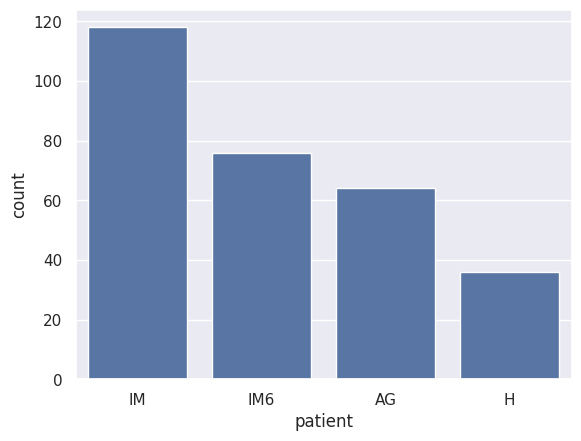

In [ ]:
sns.barplot(df.patient.value_counts().reset_index(), x='patient', y='count')

Здоровые пациенты

In [ ]:
H_data = df[df.patient == "H"]
H_data.head(5)

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
64,ПАВЛЕВАНОВ(СТУД)-ПАССИВ,0.736249,0.576227,0.740,0.572,0.073758,0.047059,0.272,0.472,0.972,0.948,0.738435,0.573926,0.084,0.052,0.044,0.028,H
65,ПОЛИТОВ(СТ)-ПАССИВ,0.662491,0.438281,0.656,0.424,0.039541,0.047486,0.380,0.320,0.896,1.116,0.659017,0.431320,0.044,0.044,0.020,0.020,H
66,РУДНИЧЕНКО-2,0.852067,NaN,0.852,NaN,0.055528,NaN,0.692,NaN,0.996,NaN,0.852576,NaN,0.084,NaN,0.040,NaN,H
67,СВИРИДОВ(СТУД)ПАССИВ,0.819902,0.618910,0.840,0.616,0.114963,0.057896,0.272,0.396,1.000,0.896,0.838646,0.616162,0.068,0.072,0.036,0.036,H
68,СПИРИДОНОВ(СТ)_ПАССИВ,0.980702,0.542336,0.984,0.540,0.059722,0.031187,0.424,0.464,1.136,1.028,0.984439,0.541651,0.069,0.036,0.036,0.016,H


In [ ]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 64 to 99
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36 non-null     object 
 1   rrg_mean_лежа       36 non-null     float64
 2   rrg_mean_стоя       16 non-null     float64
 3   rrg_median_лежа     36 non-null     float64
 4   rrg_median_стоя     16 non-null     float64
 5   rrg_std_лежа        36 non-null     float64
 6   rrg_std_стоя        16 non-null     float64
 7   rrg_min_лежа        36 non-null     float64
 8   rrg_min_стоя        16 non-null     float64
 9   rrg_max_лежа        36 non-null     float64
 10  rrg_max_стоя        16 non-null     float64
 11  rrg_trim_mean_лежа  36 non-null     float64
 12  rrg_trim_mean_стоя  16 non-null     float64
 13  rrg_iqr_лежа        36 non-null     float64
 14  rrg_iqr_стоя        16 non-null     float64
 15  rrg_mad_лежа        36 non-null     float64
 16  rrg_mad_стоя  

Пациенты с гипертонией

In [ ]:
AG_data = df[df.patient == "AG"]
AG_data.head()

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
0,АГ-001_1,0.911795,0.852760,0.912,0.852,0.019906,0.028938,0.812,0.636,0.948,1.056,0.913706,0.852877,0.020,0.032,0.012,0.016,AG
1,АГ-002_1,0.729976,0.659733,0.728,0.660,0.032458,0.029800,0.580,0.576,0.856,0.760,0.728587,0.659980,0.040,0.040,0.020,0.020,AG
2,АГ-003_1,0.948242,0.702628,0.948,0.704,0.038755,0.047599,0.796,0.512,1.084,1.572,0.948345,0.702581,0.052,0.056,0.024,0.028,AG
3,АГ-004_1,1.166237,0.889435,1.184,0.894,0.070413,0.058731,0.896,0.716,1.300,1.032,1.174049,0.890913,0.084,0.072,0.040,0.038,AG
4,АГ-005_1,0.730133,0.663203,0.728,0.664,0.027302,0.031371,0.652,0.552,0.884,0.820,0.729099,0.663184,0.036,0.036,0.016,0.016,AG


In [ ]:
AG_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  64 non-null     object 
 1   rrg_mean_лежа       64 non-null     float64
 2   rrg_mean_стоя       63 non-null     float64
 3   rrg_median_лежа     64 non-null     float64
 4   rrg_median_стоя     63 non-null     float64
 5   rrg_std_лежа        64 non-null     float64
 6   rrg_std_стоя        63 non-null     float64
 7   rrg_min_лежа        64 non-null     float64
 8   rrg_min_стоя        63 non-null     float64
 9   rrg_max_лежа        64 non-null     float64
 10  rrg_max_стоя        63 non-null     float64
 11  rrg_trim_mean_лежа  64 non-null     float64
 12  rrg_trim_mean_стоя  63 non-null     float64
 13  rrg_iqr_лежа        64 non-null     float64
 14  rrg_iqr_стоя        63 non-null     float64
 15  rrg_mad_лежа        64 non-null     float64
 16  rrg_mad_стоя   

Пациенты с острым инфарктом миокарда

In [ ]:
IM_data = df[df.patient == "IM"]
IM_data.head(5)

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
100,IM-001,0.758473,NaN,0.756,NaN,0.027190,NaN,0.448,NaN,1.012,NaN,0.758427,NaN,0.020,NaN,0.008,NaN,IM
101,IM-002,1.079228,NaN,1.084,NaN,0.043992,NaN,0.860,NaN,1.300,NaN,1.084209,NaN,0.044,NaN,0.024,NaN,IM
102,IM-003,0.623471,NaN,0.624,NaN,0.018475,NaN,0.468,NaN,0.988,NaN,0.623511,NaN,0.008,NaN,0.004,NaN,IM
103,IM-004,0.800290,NaN,0.780,NaN,0.075484,NaN,0.316,NaN,1.136,NaN,0.793997,NaN,0.108,NaN,0.044,NaN,IM
104,IM-005,0.898232,NaN,0.900,NaN,0.027138,NaN,0.816,NaN,1.028,NaN,0.898349,NaN,0.036,NaN,0.020,NaN,IM


In [ ]:
IM_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 100 to 217
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  118 non-null    object 
 1   rrg_mean_лежа       118 non-null    float64
 2   rrg_mean_стоя       0 non-null      float64
 3   rrg_median_лежа     118 non-null    float64
 4   rrg_median_стоя     0 non-null      float64
 5   rrg_std_лежа        118 non-null    float64
 6   rrg_std_стоя        0 non-null      float64
 7   rrg_min_лежа        118 non-null    float64
 8   rrg_min_стоя        0 non-null      float64
 9   rrg_max_лежа        118 non-null    float64
 10  rrg_max_стоя        0 non-null      float64
 11  rrg_trim_mean_лежа  118 non-null    float64
 12  rrg_trim_mean_стоя  0 non-null      float64
 13  rrg_iqr_лежа        118 non-null    float64
 14  rrg_iqr_стоя        0 non-null      float64
 15  rrg_mad_лежа        118 non-null    float64
 16  rrg_mad_сто

Заметим, что у пациентов с острым инфарктом миокарда отсутствуют данные в положении стоя, скорее всего, данные отсутствуют по причине невозможности провести измерения.

In [ ]:
IM_data = IM_data.drop(['rrg_mean_стоя','rrg_median_стоя', 'rrg_std_стоя', 'rrg_min_стоя', 'rrg_max_стоя', 'rrg_trim_mean_стоя', 'rrg_iqr_стоя', 'rrg_mad_стоя'], axis=1)
IM_data.head(5)

,id,rrg_mean_лежа,rrg_median_лежа,rrg_std_лежа,rrg_min_лежа,rrg_max_лежа,rrg_trim_mean_лежа,rrg_iqr_лежа,rrg_mad_лежа,patient
100,IM-001,0.758473,0.756,0.027190,0.448,1.012,0.758427,0.020,0.008,IM
101,IM-002,1.079228,1.084,0.043992,0.860,1.300,1.084209,0.044,0.024,IM
102,IM-003,0.623471,0.624,0.018475,0.468,0.988,0.623511,0.008,0.004,IM
103,IM-004,0.800290,0.780,0.075484,0.316,1.136,0.793997,0.108,0.044,IM
104,IM-005,0.898232,0.900,0.027138,0.816,1.028,0.898349,0.036,0.020,IM


In [ ]:
IM_6_mon_data = df[df.patient == "IM6"]
IM_6_mon_data

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
218,IM-001_4П,0.806896,0.891935,0.808,0.892,0.034985,0.028993,0.516,0.624,1.136,1.176,0.807112,0.891811,0.032,0.024,0.016,0.012,IM6
219,IM-005_4П,0.689536,NaN,0.688,NaN,0.024187,NaN,0.624,NaN,0.912,NaN,0.688005,NaN,0.028,NaN,0.016,NaN,IM6
220,IM-005-ПС,NaN,0.697612,NaN,0.696,NaN,0.034375,NaN,0.376,NaN,0.848,NaN,0.696595,NaN,0.036,NaN,0.020,IM6
221,IM-006_4П,1.026544,NaN,1.048,NaN,0.094903,NaN,0.432,NaN,1.216,NaN,1.041962,NaN,0.068,NaN,0.036,NaN,IM6
222,IM-006_ПС,NaN,0.899285,NaN,0.896,NaN,0.035907,NaN,0.804,NaN,1.180,NaN,0.897567,NaN,0.044,NaN,0.024,IM6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,IM-104_ПС,NaN,0.614224,NaN,0.612,NaN,0.031489,NaN,0.392,NaN,0.940,NaN,0.611474,NaN,0.012,NaN,0.008,IM6
290,IM-108_П4,0.874383,NaN,0.880,NaN,0.072025,NaN,0.372,NaN,1.228,NaN,0.880785,NaN,0.024,NaN,0.012,NaN,IM6
291,IM-108_ПС,NaN,0.721575,NaN,0.748,NaN,0.118658,NaN,0.380,NaN,1.000,NaN,0.736784,NaN,0.104,NaN,0.052,IM6
292,IM-111_4ПС2,1.007668,1.045978,1.012,1.044,0.031950,0.023522,0.840,0.960,1.088,1.112,1.008929,1.046059,0.048,0.032,0.024,0.016,IM6


В некоторых строках информация о положении стоя и лежа разбита на разные строки, хотя идентификаторы одинаковые. Для дальнейшего удобства строчки с одинаковыми ID объединим и приведем к одному формату без дополнительных буквенных обозначений(*Например: 4П, ПС, 4ПС2*).

In [ ]:
IM_6_mon_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 218 to 293
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  76 non-null     object 
 1   rrg_mean_лежа       58 non-null     float64
 2   rrg_mean_стоя       56 non-null     float64
 3   rrg_median_лежа     58 non-null     float64
 4   rrg_median_стоя     56 non-null     float64
 5   rrg_std_лежа        58 non-null     float64
 6   rrg_std_стоя        56 non-null     float64
 7   rrg_min_лежа        58 non-null     float64
 8   rrg_min_стоя        56 non-null     float64
 9   rrg_max_лежа        58 non-null     float64
 10  rrg_max_стоя        56 non-null     float64
 11  rrg_trim_mean_лежа  58 non-null     float64
 12  rrg_trim_mean_стоя  56 non-null     float64
 13  rrg_iqr_лежа        58 non-null     float64
 14  rrg_iqr_стоя        56 non-null     float64
 15  rrg_mad_лежа        58 non-null     float64
 16  rrg_mad_стоя

Просмотрим в каком формате представлены ID, и есть ли данные котрые не соответсвуют

In [ ]:
id_d = IM_6_mon_data.id
# s - ID в правильном формате
s = set()
for i in id_d:
  k = i.split("_")
  t = k[0].split("-")
  if len(k) == 2 and len(t) == 2 and t[1].isdigit():
    s.add(k[0])
  else:
    print(i)


IM-005-ПС
IM-017*_4
IM005_4ПС2


В строках встречается три ID, котрые не соответсувуют формату IM-000. Заменим их вручную, так как их не много.

In [ ]:
IM_6_mon_data["id"] = IM_6_mon_data["id"].replace(["IM-005-ПС", "IM-017*_4", "IM005_4ПС2"], ["IM-005_ПС", "IM-017_4", "IM-005_4ПС2"])

<ipython-input-27-81e32ac4b3f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IM_6_mon_data["id"] = IM_6_mon_data["id"].replace(["IM-005-ПС", "IM-017*_4", "IM005_4ПС2"], ["IM-005_ПС", "IM-017_4", "IM-005_4ПС2"])


В датасете встраечтся три строки с идентификатором IM-005, две с пропусками одна без, для удобства работы удалим строчки IM-005, котрые с пропусками

In [ ]:
IM_6_mon_data = IM_6_mon_data[IM_6_mon_data.id != "IM-005_4П"]
IM_6_mon_data = IM_6_mon_data[IM_6_mon_data.id != "IM-005_ПС"]

Приведу ID к одинаковому виду IM-000

In [ ]:
IM_6_mon_data['id'] = IM_6_mon_data['id'].apply(lambda i: i.split("_")[0])
IM_6_mon_data.head(3)

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
218,IM-001,0.806896,0.891935,0.808,0.892,0.034985,0.028993,0.516,0.624,1.136,1.176,0.807112,0.891811,0.032,0.024,0.016,0.012,IM6
221,IM-006,1.026544,NaN,1.048,NaN,0.094903,NaN,0.432,NaN,1.216,NaN,1.041962,NaN,0.068,NaN,0.036,NaN,IM6
222,IM-006,NaN,0.899285,NaN,0.896,NaN,0.035907,NaN,0.804,NaN,1.180,NaN,0.897567,NaN,0.044,NaN,0.024,IM6


In [ ]:
IM_6_mon_data[IM_6_mon_data.duplicated(['id'], keep=False)]

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
221,IM-006,1.026544,NaN,1.048,NaN,0.094903,NaN,0.432,NaN,1.216,NaN,1.041962,NaN,0.068,NaN,0.036,NaN,IM6
222,IM-006,NaN,0.899285,NaN,0.896,NaN,0.035907,NaN,0.804,NaN,1.180,NaN,0.897567,NaN,0.044,NaN,0.024,IM6
223,IM-008,0.793287,NaN,0.780,NaN,0.070966,NaN,0.676,NaN,1.688,NaN,0.783837,NaN,0.056,NaN,0.028,NaN,IM6
224,IM-008,NaN,0.715296,NaN,0.712,NaN,0.037022,NaN,0.660,NaN,1.464,NaN,0.712410,NaN,0.032,NaN,0.016,IM6
225,IM-009,0.818708,NaN,0.820,NaN,0.019687,NaN,0.760,NaN,0.860,NaN,0.820279,NaN,0.024,NaN,0.012,NaN,IM6
226,IM-009,NaN,0.751942,NaN,0.752,NaN,0.014707,NaN,0.712,NaN,0.784,NaN,0.752627,NaN,0.020,NaN,0.012,IM6
227,IM-011,1.001047,NaN,1.000,NaN,0.023366,NaN,0.928,NaN,1.064,NaN,1.001217,NaN,0.032,NaN,0.016,NaN,IM6
228,IM-011,NaN,0.877582,NaN,0.872,NaN,0.100499,NaN,0.824,NaN,3.568,NaN,0.873373,NaN,0.028,NaN,0.016,IM6
229,IM-012,0.859172,NaN,0.856,NaN,0.031925,NaN,0.652,NaN,0.968,NaN,0.857877,NaN,0.044,NaN,0.020,NaN,IM6
230,IM-012,NaN,0.845151,NaN,0.840,NaN,0.052394,NaN,0.744,NaN,1.172,NaN,0.839476,NaN,0.043,NaN,0.020,IM6


In [ ]:
IM_6_mon_data = IM_6_mon_data.replace('',np.nan, regex=True)
IM_6_mon_data = IM_6_mon_data.groupby('id',as_index=False,sort=False).last()
IM_6_mon_data = IM_6_mon_data.sort_values(by=['id'])
IM_6_mon_data.head(5)

,id,rrg_mean_лежа,rrg_mean_стоя,rrg_median_лежа,rrg_median_стоя,rrg_std_лежа,rrg_std_стоя,rrg_min_лежа,rrg_min_стоя,rrg_max_лежа,rrg_max_стоя,rrg_trim_mean_лежа,rrg_trim_mean_стоя,rrg_iqr_лежа,rrg_iqr_стоя,rrg_mad_лежа,rrg_mad_стоя,patient
0,IM-001,0.806896,0.891935,0.808,0.892,0.034985,0.028993,0.516,0.624,1.136,1.176,0.807112,0.891811,0.032,0.024,0.016,0.012,IM6
56,IM-005,0.679039,0.654125,0.680,0.648,0.046341,0.092983,0.408,0.464,0.824,2.768,0.680439,0.649824,0.028,0.028,0.014,0.012,IM6
1,IM-006,1.026544,0.899285,1.048,0.896,0.094903,0.035907,0.432,0.804,1.216,1.180,1.041962,0.897567,0.068,0.044,0.036,0.024,IM6
2,IM-008,0.793287,0.715296,0.780,0.712,0.070966,0.037022,0.676,0.660,1.688,1.464,0.783837,0.712410,0.056,0.032,0.028,0.016,IM6
3,IM-009,0.818708,0.751942,0.820,0.752,0.019687,0.014707,0.760,0.712,0.860,0.784,0.820279,0.752627,0.024,0.020,0.012,0.012,IM6


Для удобвства объеденим используемые данные в одну таблицу

#1) Дополнение наборов ЧСС в положение стоя и лежа, а также анализ. Для пациентов Н, AG, IM6


In [ ]:
H_data['rrg_mean_лежа/rrg_mean_стоя в %'] = ((H_data['rrg_mean_лежа'] / H_data['rrg_mean_стоя']).round(3) * 100 - 100)
H_data['rrg_median_лежа/rrg_median_стоя в %'] = ((H_data['rrg_median_лежа'] / H_data['rrg_median_стоя']).round(3) * 100 - 100)
H_data['rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'] = ((H_data['rrg_mean_лежа'] / H_data['rrg_mean_стоя']).round(3) * 100 - 100)

AG_data['rrg_mean_лежа/rrg_mean_стоя в %'] = ((AG_data['rrg_mean_лежа'] / AG_data['rrg_mean_стоя']).round(3) * 100 - 100)
AG_data['rrg_median_лежа/rrg_median_стоя в %'] = ((AG_data['rrg_median_лежа'] / AG_data['rrg_median_стоя']).round(3) * 100 - 100)
AG_data['rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'] = ((AG_data['rrg_mean_лежа'] / AG_data['rrg_mean_стоя']).round(3) * 100 - 100)

IM_6_mon_data['rrg_mean_лежа/rrg_mean_стоя в %'] = ((IM_6_mon_data['rrg_mean_лежа'] / IM_6_mon_data['rrg_mean_стоя']).round(3) * 100 - 100)
IM_6_mon_data['rrg_median_лежа/rrg_median_стоя в %'] = ((IM_6_mon_data['rrg_median_лежа'] / IM_6_mon_data['rrg_median_стоя']).round(3) * 100 - 100)
IM_6_mon_data['rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'] = ((IM_6_mon_data['rrg_mean_лежа'] / IM_6_mon_data['rrg_mean_стоя']).round(3) * 100 - 100)

<ipython-input-32-c642ed995e8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H_data['rrg_mean_лежа/rrg_mean_стоя в %'] = ((H_data['rrg_mean_лежа'] / H_data['rrg_mean_стоя']).round(3) * 100 - 100)
<ipython-input-32-c642ed995e8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H_data['rrg_median_лежа/rrg_median_стоя в %'] = ((H_data['rrg_median_лежа'] / H_data['rrg_median_стоя']).round(3) * 100 - 100)
<ipython-input-32-c642ed995e8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
data_up = pd.concat([H_data, AG_data, IM_6_mon_data], ignore_index=True)
data_down = pd.concat([H_data, AG_data, IM_6_mon_data, IM_data], ignore_index=True)

#2)Проведём анализ по признакам

In [ ]:
data_down.groupby('patient')['rrg_mean_лежа'].agg(['mean', 'median', 'std'])

,mean,median,std
patient,,,
AG,0.927314,0.927767,0.140633
H,0.829833,0.842149,0.136565
IM,0.902988,0.883281,0.167178
IM6,0.857248,0.855010,0.132549


In [ ]:
data_up.groupby('patient')['rrg_mean_стоя'].agg(['mean', 'median', 'std'])

,mean,median,std
patient,,,
AG,0.762247,0.750424,0.125383
H,0.614012,0.629703,0.101186
IM6,0.771199,0.754361,0.139825


<Axes: >

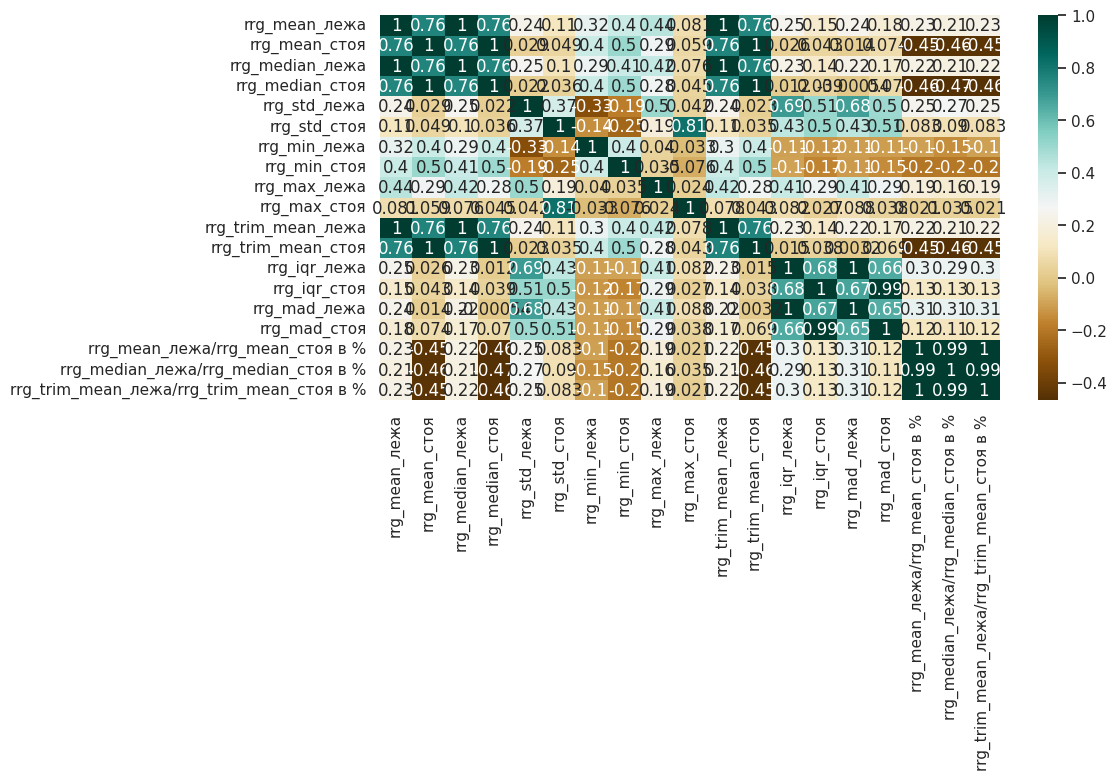

In [ ]:
plt.figure(figsize=(10, 5))
corr = data_up.drop(["id", "patient"], axis=1).corr()
sns.heatmap(corr, cmap="BrBG", annot=True)

#3) Проведём анализ графиков и посмтрим на распределение

Анализ лежа

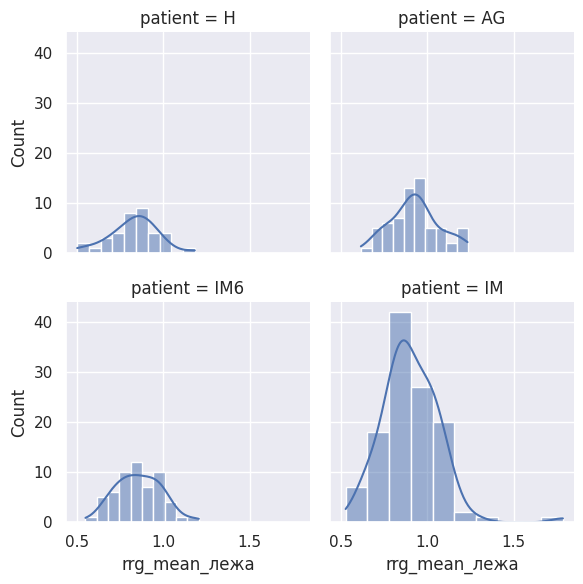

In [ ]:
g = sns.FacetGrid (data=data_down, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_mean_лежа', bins=10, kde=True)

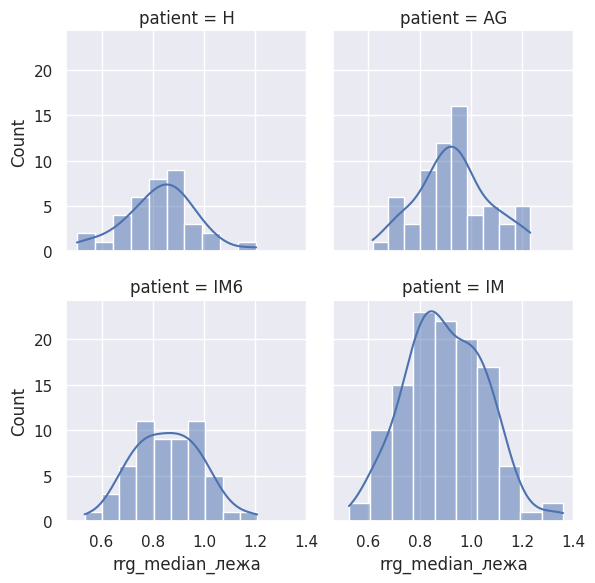

In [ ]:
g = sns.FacetGrid (data=data_down, col='patient', col_wrap=2)
g.map(sns.histplot , 'rrg_median_лежа', bins=10, kde=True)

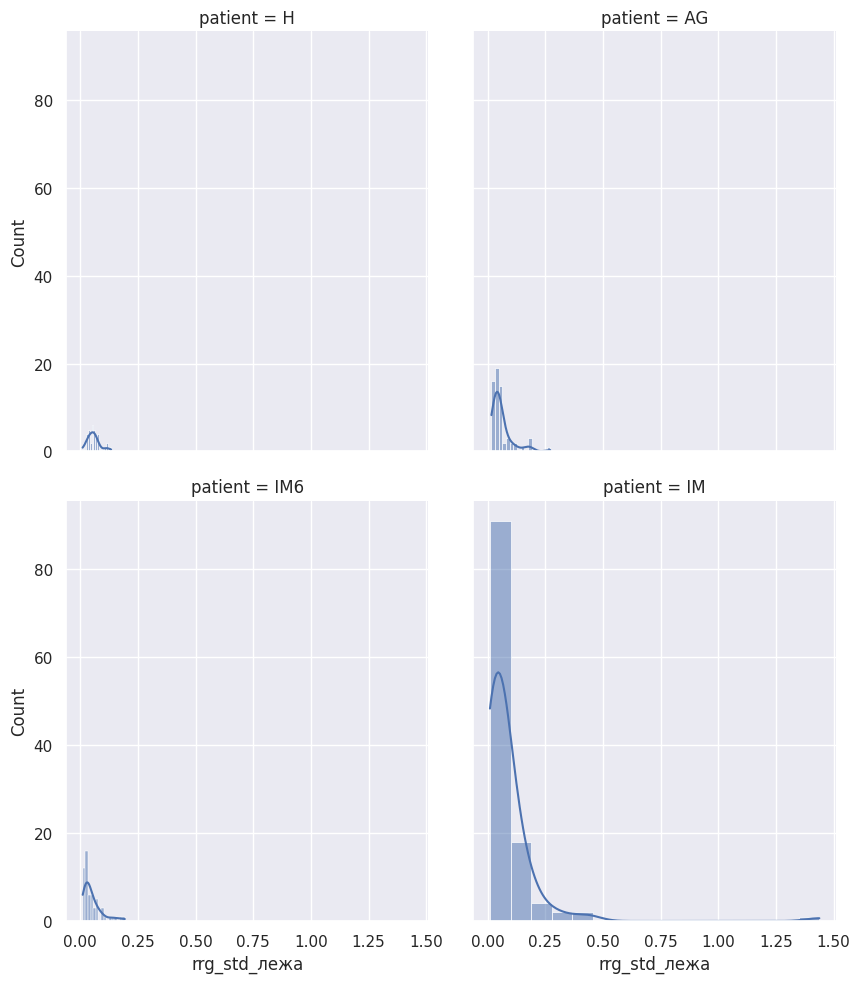

In [ ]:
g = sns.FacetGrid (data=data_down, col='patient', col_wrap=2, height = 5, aspect = .4 )
g.map(sns.histplot , 'rrg_std_лежа', bins=16, kde=True)
g.fig.set_size_inches(10, 10)

Анализ стоя

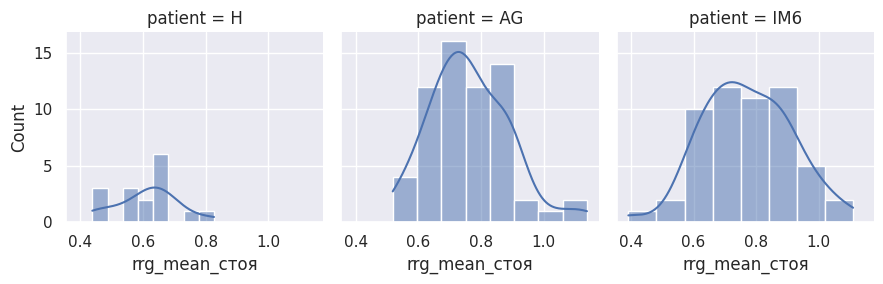

In [ ]:
g = sns.FacetGrid (data=data_up, col='patient', col_wrap=3)
g.map(sns.histplot , 'rrg_mean_стоя', bins=8, kde=True)

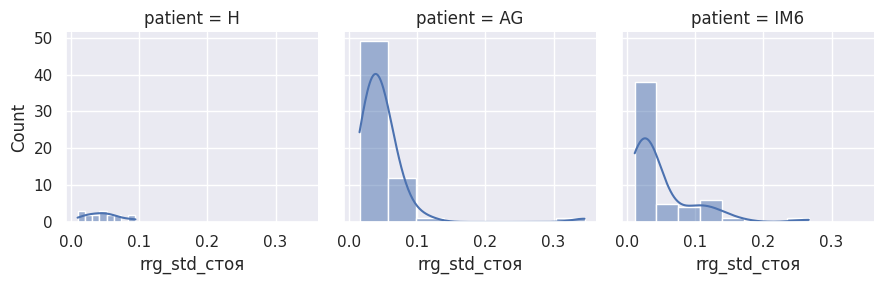

In [ ]:
g = sns.FacetGrid (data=data_up, col='patient', col_wrap=3)
g.map(sns.histplot , 'rrg_std_стоя', bins=8, kde=True)

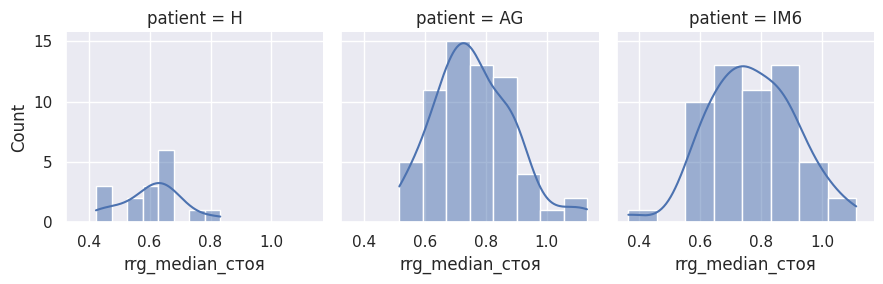

In [ ]:
g = sns.FacetGrid (data=data_up, col='patient', col_wrap=3)
g.map(sns.histplot , 'rrg_median_стоя', bins=8, kde=True)

<Axes: xlabel='patient', ylabel='rrg_mean_лежа/rrg_mean_стоя в %'>

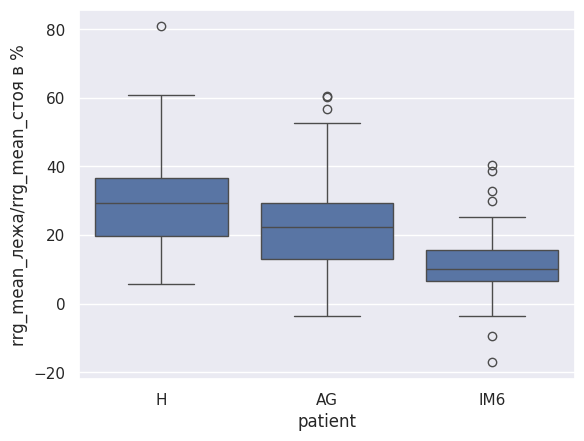

In [ ]:
sns.boxplot(data=data_up, x='patient', y=data_up['rrg_mean_лежа/rrg_mean_стоя в %'])

<Axes: xlabel='patient', ylabel='rrg_median_лежа/rrg_median_стоя в %'>

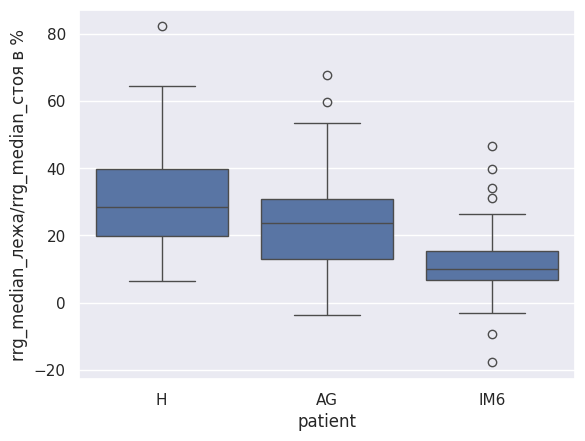

In [ ]:
sns.boxplot(data=data_up, x='patient', y=data_up['rrg_median_лежа/rrg_median_стоя в %'])

<Axes: xlabel='patient', ylabel='rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'>

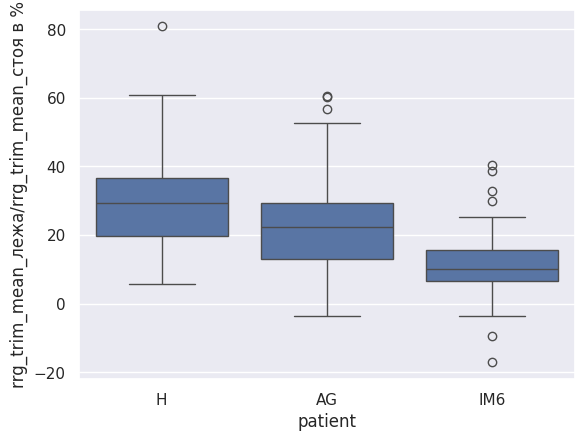

In [ ]:
sns.boxplot(data=data_up, x='patient', y=data_up['rrg_trim_mean_лежа/rrg_trim_mean_стоя в %'])

Для того, чтобы понять соответствуют ли данные логарифмически нормальному распределению, проведем тест Шапиро-Уилка.

In [ ]:
print(shapiro(H_data['rrg_mean_лежа'].dropna()))
print(shapiro(H_data['rrg_mean_стоя'].dropna()))
print(shapiro(AG_data['rrg_mean_лежа'].dropna()))
print(shapiro(AG_data['rrg_mean_стоя'].dropna()))
print(shapiro(IM_6_mon_data['rrg_mean_лежа'].dropna()))
print(shapiro(IM_6_mon_data['rrg_mean_стоя'].dropna()))

ShapiroResult(statistic=0.9772944312060687, pvalue=0.6534983006455399)
ShapiroResult(statistic=0.9537492276935854, pvalue=0.5513059454515357)
ShapiroResult(statistic=0.9799072057065423, pvalue=0.3809664046541219)
ShapiroResult(statistic=0.9739790150616071, pvalue=0.20210727240312992)
ShapiroResult(statistic=0.9905355942190365, pvalue=0.9352946977557414)
ShapiroResult(statistic=0.9891321430115374, pvalue=0.8993235895558029)


Поскольку все p-значение наших тестов больше, чем альфа = 0,05, данные о здоровых(H), гипертониках(AG) и инфаркта по прошествие 6 мес (IM6) соответствуют логарифмически нормальному распределению, мы можем проводить T-тесты.

In [ ]:
rrg_mean_лежа_H = H_data['rrg_mean_лежа'].dropna()
rrg_mean_стоя_H = H_data['rrg_mean_стоя'].dropna()
stats.ttest_ind(a=rrg_mean_стоя_H, b=rrg_mean_лежа_H)

TtestResult(statistic=-5.656295326106736, pvalue=7.450057399992547e-07, df=50.0)

In [ ]:
rrg_mean_лежа_AG = AG_data['rrg_mean_лежа'].dropna()
rrg_mean_стоя_AG = AG_data['rrg_mean_стоя'].dropna()
stats.ttest_ind(a=rrg_mean_стоя_AG, b=rrg_mean_лежа_AG)

TtestResult(statistic=-6.9780135869700874, pvalue=1.5521267302490208e-10, df=125.0)

In [ ]:
rrg_mean_лежа_IM_6 = IM_6_mon_data['rrg_mean_лежа'].dropna()
rrg_mean_стоя_IM_6 = IM_6_mon_data['rrg_mean_стоя'].dropna()
stats.ttest_ind(a=rrg_mean_стоя_IM_6, b=rrg_mean_лежа_IM_6)

TtestResult(statistic=-3.3433033949266093, pvalue=0.0011323220584528507, df=110.0)

In [ ]:
stats.ttest_ind(a=rrg_mean_стоя_H, b=rrg_mean_стоя_AG)

TtestResult(statistic=-4.37425837129357, pvalue=3.7760718085060494e-05, df=77.0)

In [ ]:
stats.ttest_ind(a=rrg_mean_стоя_H, b=rrg_mean_стоя_IM_6)

TtestResult(statistic=-4.180048222249502, pvalue=8.406550902144234e-05, df=69.0)

In [ ]:
stats.ttest_ind(a=rrg_mean_стоя_AG, b=rrg_mean_стоя_IM_6)

TtestResult(statistic=-0.36668817350665195, pvalue=0.7145196413727755, df=116.0)

#4) Анализ данных в сравнение с IM

Поскольку у пациентов с инфарктом миокарда нет данных в положении стоя, мы будем сравнивать показатели, полученные в положении лёжа.

In [ ]:
rrg_mean_лежа_IM = IM_data['rrg_median_лежа'].dropna()

In [ ]:
stats.ttest_ind(a=rrg_mean_лежа_IM_6, b=rrg_mean_лежа_IM)

TtestResult(statistic=-1.7775534474259351, pvalue=0.07723408721433211, df=173.0)